In [1]:
from loss import den_loss
import tensorflow as tf
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
test_tensor_true = None
test_tensor_pred = None

test_arr_true = np.zeros((1, 100, 100, 1))
test_arr_pred = np.zeros((1, 100, 100, 1))

test_arr_true[0][20][50] = 1
test_arr_true[0][40][80] = 1

test_arr_pred[0][22][50] = 1
test_arr_pred[0][80][10] = 1

In [3]:
print("Sum of test_arr_true: {}".format(np.sum(test_arr_true)))
print("Sum of test_arr_pred: {}".format(np.sum(test_arr_pred)))

Sum of test_arr_true: 2.0
Sum of test_arr_pred: 2.0


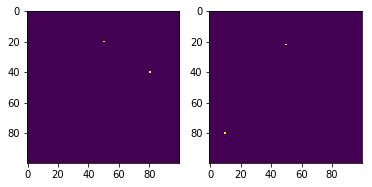

In [4]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(test_arr_true[0].reshape((test_arr_true.shape[1], test_arr_true.shape[2])))
fig.add_subplot(1, 2, 2)
plt.imshow(test_arr_pred[0].reshape((test_arr_pred.shape[1], test_arr_pred.shape[2])))
plt.show()

In [5]:
test_tensor_true = tf.convert_to_tensor(test_arr_true)
test_tensor_pred = tf.convert_to_tensor(test_arr_pred)

pred_loss = den_loss(test_tensor_true, test_tensor_pred)

with tf.Session() as sess:
    print(sess.run(pred_loss))

4.0


In [6]:
test_arr_true_den = scipy.ndimage.filters.gaussian_filter(test_arr_true, 2, mode='constant')
test_arr_pred_den = scipy.ndimage.filters.gaussian_filter(test_arr_pred, 2, mode='constant')

test_arr_true_den *= np.sum(test_arr_true) / np.sum(test_arr_true_den)
test_arr_pred_den *= np.sum(test_arr_pred) / np.sum(test_arr_pred_den)

In [7]:
print("Sum of test_arr_true_den: {}".format(np.sum(test_arr_true_den)))
print("Sum of test_arr_pred_den: {}".format(np.sum(test_arr_pred_den)))

Sum of test_arr_true_den: 2.0
Sum of test_arr_pred_den: 2.0000000000000004


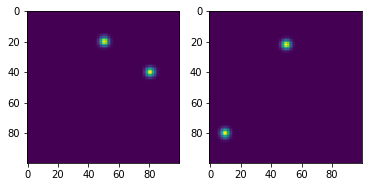

In [8]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(test_arr_true_den[0].reshape((test_arr_true_den.shape[1], test_arr_true_den.shape[2])))
fig.add_subplot(1, 2, 2)
plt.imshow(test_arr_pred_den[0].reshape((test_arr_pred_den.shape[1], test_arr_pred_den.shape[2])))
plt.show()

In [9]:
test_tensor_true_den = tf.convert_to_tensor(test_arr_true_den)
test_tensor_pred_den = tf.convert_to_tensor(test_arr_pred_den)

pred_loss_den = den_loss(test_tensor_true_den, test_tensor_pred_den)

with tf.Session() as sess:
    print(sess.run(pred_loss_den))

2.751020813499072
